In [32]:
# Reload all modules (except those excluded by %aimport) every time before executing the Python code typed.
%load_ext autoreload
%autoreload 2
%matplotlib inline
import os
import torch
import functools
from IPython.display import HTML
from task1_environment.environment.main import PacMan
from task4_a3c_cnn.train import Net
from task4_a3c_cnn.policy import channel_9_policy, visualize
from task4_a3c_cnn.utils import prepare_animation, check_winrate

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Animation presentation

In [19]:
model = Net(108, 4)
path = 'task4_a3c_cnn/checkpoints/9_channels_lr1e-3_norm_14.pt'
game = PacMan(maze_row_num=2, maze_column_num=2, maze_row_height=2, maze_column_width=2)
game = prepare_animation(
    game=game,
    model=model, 
    policy=channel_9_policy, 
    checkpoint_path=path, 
    height=7
)
game.generate_animation()
ani = HTML(game.animation.to_jshtml())
print('\n',game.process.reward)
ani

Generated frames: 198
 22


Check win rate

In [26]:
winrate = check_winrate(game, 1000) 
print(f'Win rate: {winrate:.1%}')

win rate: 31.7%


# Method

As explained in the report, the first method we tried is to feed the entire array to the model. In this way, we found out what the agent can learn is limited.
Therefore, we come up with a way to pre-process the input image and help the model to focus on different features of the current game state. The pre-processing method unlike state representation in task 2 and 3, does not have any complex rules, we simply create 9 copies of the original image and on each of the image, we will mask certain things and feed the 9 images to the model. Please see illustration below.

create a new a game to illustrate

In [95]:
game = PacMan(maze_row_num=2, maze_column_num=2, maze_row_height=2, maze_column_width=2)

this the image when the game starts, lets see what the agent will see after pre-processing.

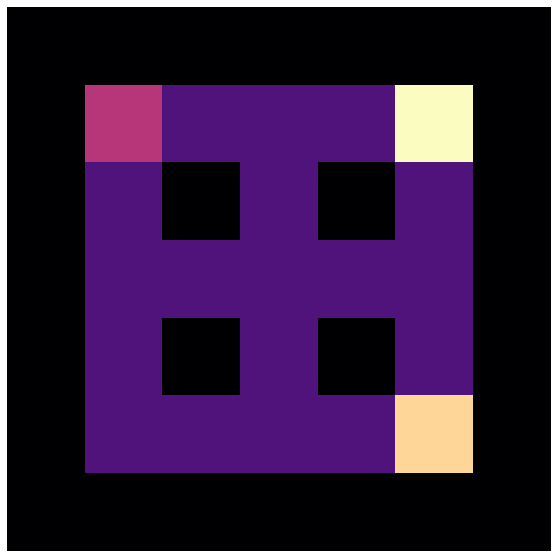

In [96]:
game.graphic.frame_figure

In [98]:
vision = visualize(game, 7)[0]

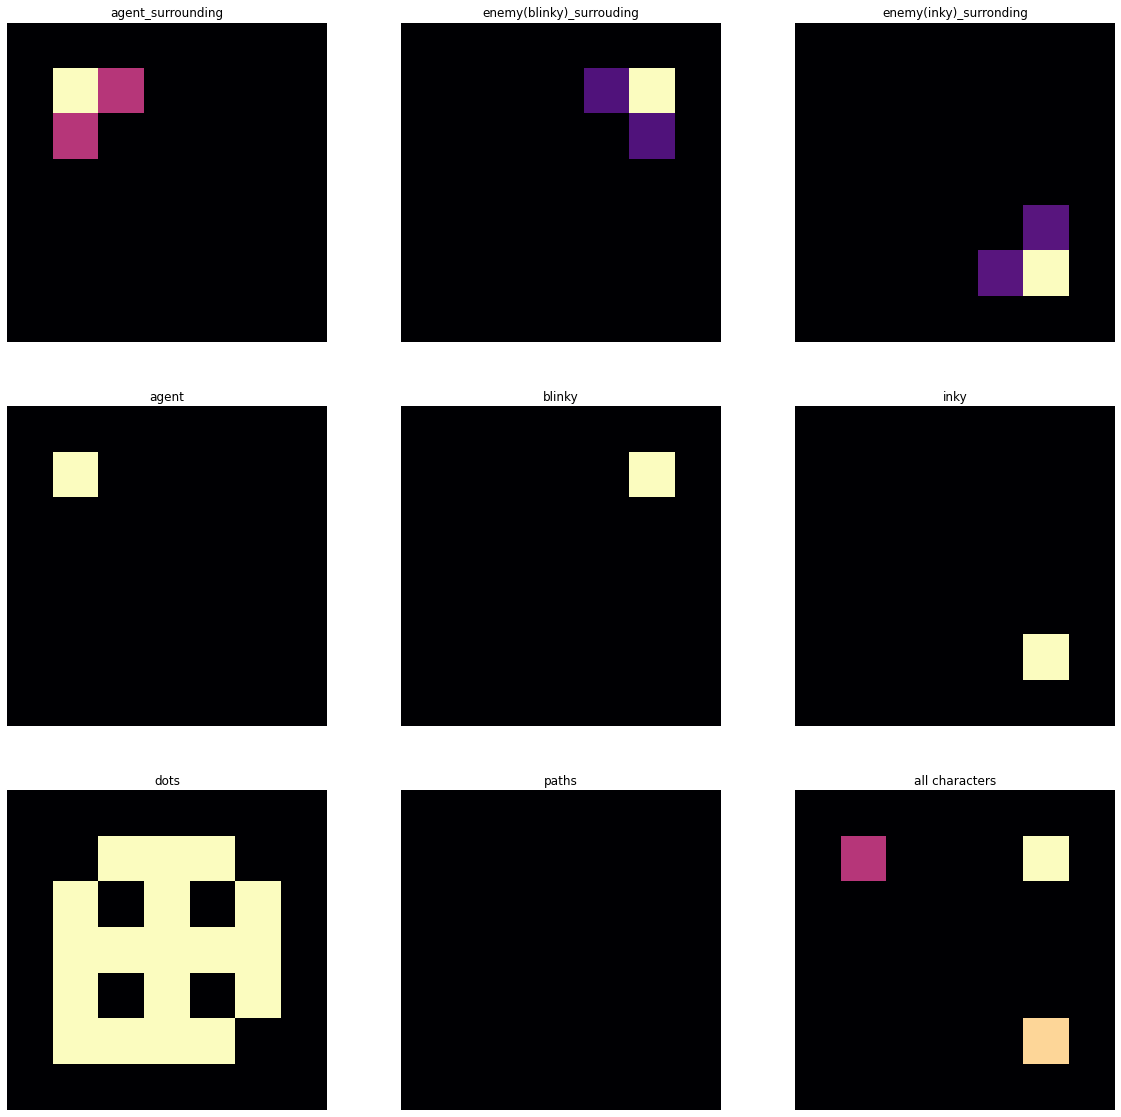

In [99]:
titles=[
    'agent_surrounding',
    'enemy(blinky)_surrouding',
    'enemy(inky)_surronding',
    'agent',
    'blinky',
    'inky',
    'dots',
    'paths',
    'all characters'
       ]
f, ax = plt.subplots(3, 3, figsize=(20,20))
for i, array in enumerate(vision):
    ax[i//3, i%3].imshow(array,interpolation=None, cmap='magma')
    ax[i//3, i%3].set_title(titles[i])
    ax[i//3, i%3].axis('off')

CNN network is capable of looking at different channels of the same image at the same time, so we utilise this capability to transform our input image to 9 channels even though the origin image only has one channel. These channels represent different information as showing in the title. Let's run the games for 10 steps and see how these channels change.

(-0.5, 6.5, 6.5, -0.5)

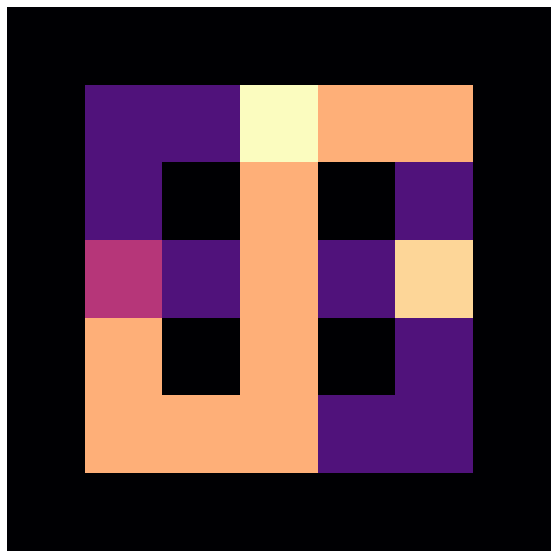

In [100]:
game.random_reset()
for i in range(10):
    game.run_one_step_without_graph()
fig, ax = plt.subplots(figsize=(30, 10))
plt.imshow(game.synthetic_array, interpolation=None, cmap='magma')
ax.axis('off')

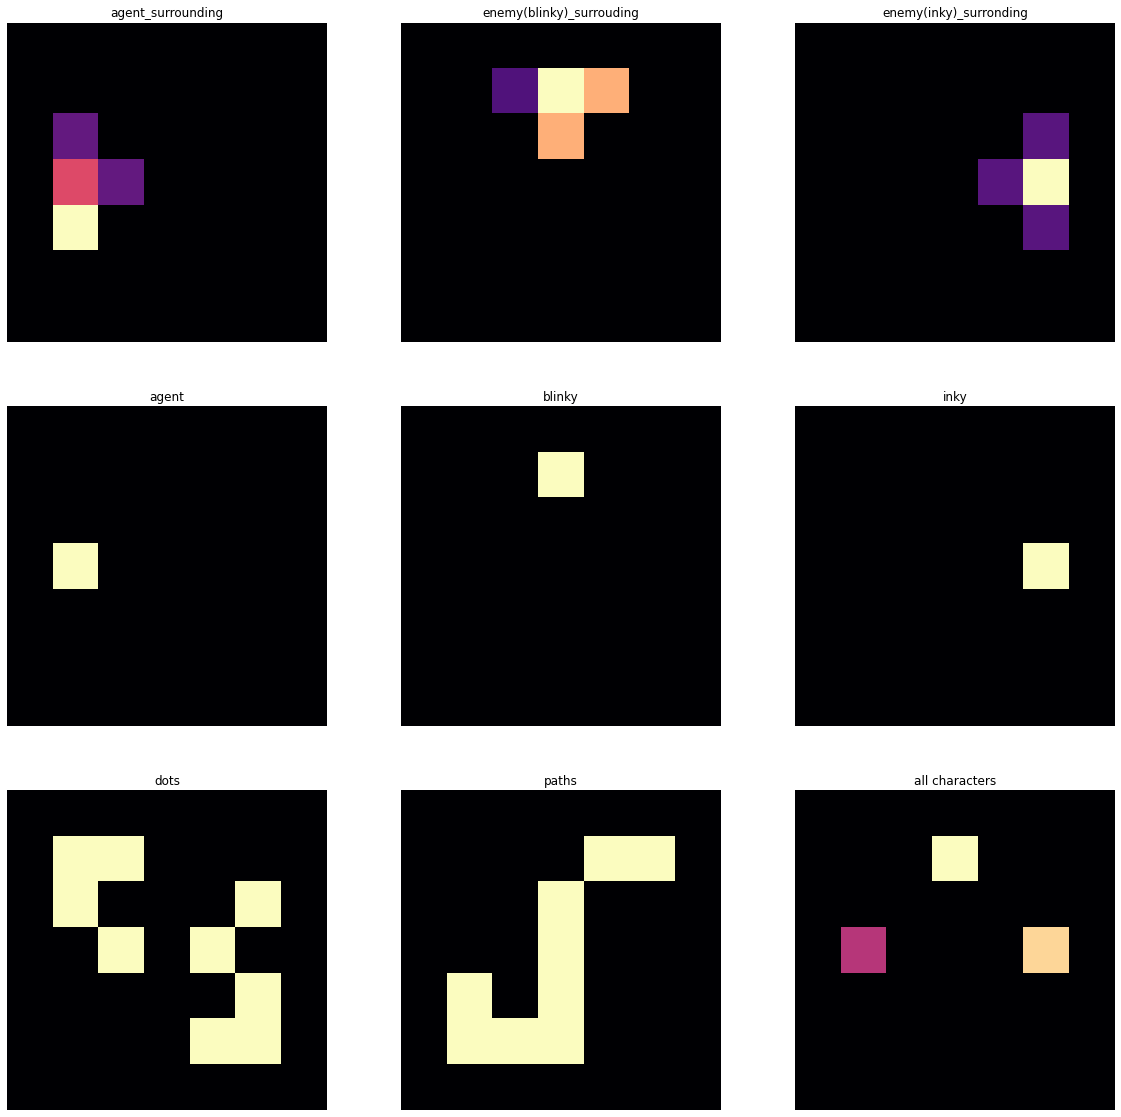

In [101]:
vision = visualize(game, 7)[0]
f, ax = plt.subplots(3, 3, figsize=(20,20))
for i, array in enumerate(vision):
    ax[i//3, i%3].imshow(array,interpolation=None, cmap='magma')
    ax[i//3, i%3].set_title(titles[i])
    ax[i//3, i%3].axis('off')

The illustration of task 4 ends. For training script, please see `./task4_a3c_cnn/train.py`. For the performance of the model, please see the win rate check and animation generation above.